# Modelling

This notebook is dedicated to building, training, evaluating, and interpreting machine learning models using the cleaned dataset.

In [8]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load Cleaned Data

In [2]:
df = pd.read_csv('../data/StudentsPerformance.csv')  # Adjust path as needed
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Feature Selection & Engineering

In [4]:
# Example: Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('math score', axis=1)  # Replace with your target column
y = df_encoded['math score']

## Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection, Training, and Evaluation

Accuracy: 0.055
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          4

c:\Users\leeno\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\leeno\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\leeno\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

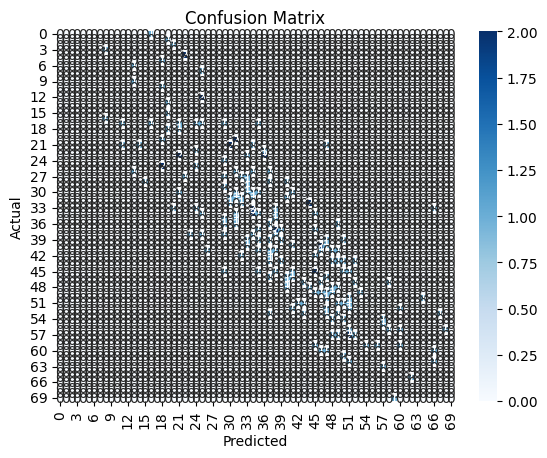

In [6]:
# Example: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tuning (Optional)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {...}
# grid = GridSearchCV(model, param_grid, cv=5)
# grid.fit(X_train, y_train)
# print('Best parameters:', grid.best_params_)

## Model Interpretation (Optional)

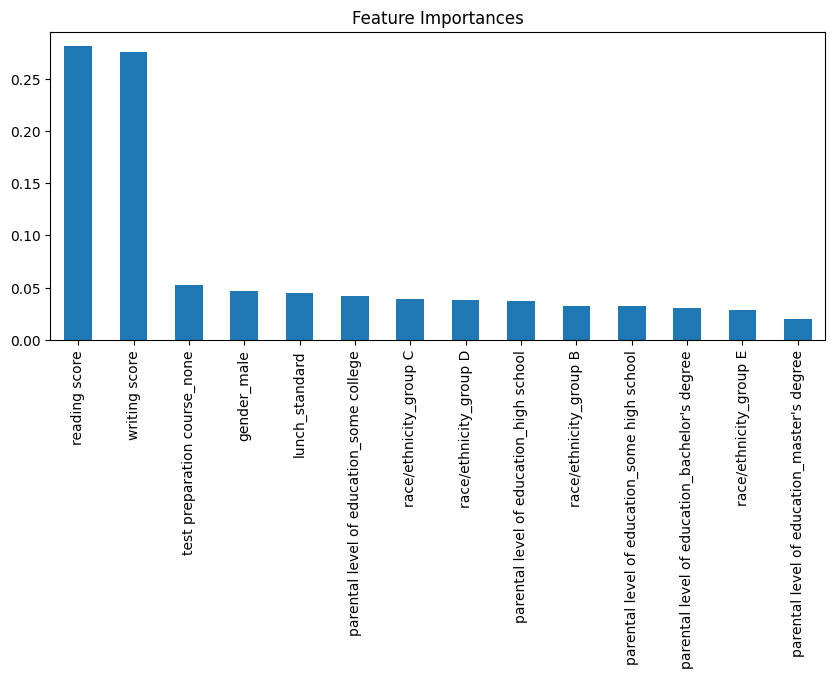

In [7]:
# Example: Feature importances
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10,4), title='Feature Importances')
plt.show()